In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_name = 'Covid-19.csv'
folder_path = r'..\Datos-COVID19\output\producto1'
file_path = os.path.join(folder_path, file_name)

In [3]:
df = pd.read_csv(file_path)
df

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,Tasa
0,Arica y Parinacota,15,Arica,15101,247552.0,6.0,6.0,12.0,41.0,63.0,87.0,115.0,124.0,134.0,166.0,67.1
1,Arica y Parinacota,15,Camarones,15102,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202,810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Tarapacá,1,Alto Hospicio,1107,129999.0,0.0,0.0,0.0,5.0,6.0,10.0,14.0,15.0,16.0,27.0,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Magallanes,12,Punta Arenas,12101,141984.0,29.0,87.0,143.0,203.0,207.0,299.0,387.0,416.0,470.0,516.0,363.4
342,Magallanes,12,Rio Verde,12103,211.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343,Magallanes,12,San Gregorio,12104,681.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
344,Magallanes,12,Timaukel,12303,282.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
lst_cmn = ['Nunoa', 'Providencia']
dict_area = {'Pedro Aguirre Cerda':12.0,
             'Cerrillos':21.0,
             'Quinta Normal':10.0,
             'Nunoa':16.9,
             'Las Condes':99.0,
             'Providencia':14.34,
             'Quilicura':58.0,
             'Iquique':20.9,
             'Antofagasta':15.0,
             'Alto Hospicio':20.0,
             'Arica':11.0,
             'El Bosque':14.1,
             'San Bernardo':39.5,
             'Cerro Navia':11.1}

dict_oldp = {'Nunoa':0.2532,
             'Providencia':0.2755}

lst_df = []
ncmn = len(lst_cmn)

for ind in range(ncmn):
    lst_df.append(df[df.Comuna == lst_cmn[ind]]) 

for ind in range(ncmn):
    display(lst_df[ind])

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,Tasa
110,Metropolitana,13,Nunoa,13120,250192.0,67.0,84.0,93.0,107.0,118.0,155.0,171.0,188.0,217.0,240.0,95.9


,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,2020-04-10,2020-04-13,2020-04-15,2020-04-17,2020-04-20,Tasa
117,Metropolitana,13,Providencia,13123,157749.0,82.0,87.0,94.0,104.0,115.0,129.0,136.0,147.0,164.0,180.0,114.1


In [5]:
def bld_df(df, area, oldp):
    index = []
    cases = []
    df_out = pd.DataFrame()
    index = list(df.columns[5:-1].values)
    idx = df.index[0]
    for date in index:
        num = df.loc[idx][date]
        cases.append(float(num)) 
    index.insert(0,'2020-3-28')
    cases.insert(0,float(0))
    index = [pd.to_datetime(ind) for ind in index]
    df.Poblacion = df.Poblacion*oldp
    df_out = pd.DataFrame(cases, index=index, columns=['cum_cases'])
    df_out['date']                = df_out.index.values   
    df_out['cum_cases_per_100th'] = 1e3 * df_out['cum_cases'] / float(df.Poblacion)
    df_out['new_cases']           = df_out['cum_cases'].diff(periods=1)
    df_out['new_cases3']          = df_out['cum_cases'].diff(periods=3)
    df_out['new_cases5']          = df_out['cum_cases'].diff(periods=5)
    df_out['new_cases7']          = df_out['cum_cases'].diff(periods=7)
    df_out['shift_cum_cases']     = df_out['cum_cases'].shift(1, axis=0)
    df_out['increment']           = 100.0 * df_out['new_cases'] / df_out['cum_cases']
    df_out['increment3']          = 100.0 * df_out['new_cases3'] / df_out['cum_cases']
    df_out['increment5']          = 100.0 * df_out['new_cases5'] / df_out['cum_cases']
    df_out['increment7']          = 100.0 * df_out['new_cases7'] / df_out['cum_cases']
    df_out['new_cases_per_100th'] = 1e3 * df_out['new_cases'] / float(df.Poblacion)
    df_out['new_cases3_per_100th']= 1e3 * df_out['new_cases3'] / float(df.Poblacion)
    df_out['new_cases5_per_100th']= 1e3 * df_out['new_cases5'] / float(df.Poblacion)
    df_out['new_cases7_per_100th']= 1e3 * df_out['new_cases7'] / float(df.Poblacion)
    df_out['new_cas_per_100th_area'] = 1e4 * df_out['new_cases'] / float(df.Poblacion) / area
    df_out['new_cas3_per_100th_area']= 1e4 * df_out['new_cases3'] / float(df.Poblacion) / area
    df_out['new_cas5_per_100th_area']= 1e4 * df_out['new_cases5'] / float(df.Poblacion) / area
    df_out['new_cas7_per_100th_area']= 1e4 * df_out['new_cases7'] / float(df.Poblacion) / area
    
    
    return df_out

def itp_df(df):
    df_itp = df.resample('D').mean()
    df_itp = df_itp.interpolate()
    
    return df_itp

In [6]:
lst_ts = []
lst_ts_tmp = []

for ind in range(ncmn):
    oldp = dict_oldp[lst_cmn[ind]]
    area = dict_area[lst_cmn[ind]]
    lst_ts_tmp.append(bld_df(lst_df[ind], area, oldp))

for ind in range(ncmn):
    lst_ts.append(itp_df(lst_ts_tmp[ind]))

for ind in range(ncmn):
    display(lst_ts[ind])

C:\Users\HN566KT\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,cum_cases,cum_cases_per_100th,new_cases,new_cases3,new_cases5,new_cases7,shift_cum_cases,increment,increment3,increment5,increment7,new_cases_per_100th,new_cases3_per_100th,new_cases5_per_100th,new_cases7_per_100th,new_cas_per_100th_area,new_cas3_per_100th_area,new_cas5_per_100th_area,new_cas7_per_100th_area
2020-03-28,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,33.500000,0.528820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,67.000000,1.057640,67.000000,NaN,NaN,NaN,0.000000,100.000000,NaN,NaN,NaN,1.057640,NaN,NaN,NaN,0.625822,NaN,NaN,NaN
2020-03-31,75.500000,1.191818,42.000000,NaN,NaN,NaN,33.500000,60.119048,NaN,NaN,NaN,0.662998,NaN,NaN,NaN,0.392306,NaN,NaN,NaN
2020-04-01,84.000000,1.325996,17.000000,NaN,NaN,NaN,67.000000,20.238095,NaN,NaN,NaN,0.268356,NaN,NaN,NaN,0.158791,NaN,NaN,NaN
2020-04-02,88.500000,1.397031,13.000000,NaN,NaN,NaN,75.500000,14.957757,NaN,NaN,NaN,0.205214,NaN,NaN,NaN,0.121428,NaN,NaN,NaN
2020-04-03,93.000000,1.468067,9.000000,93.000000,NaN,NaN,84.000000,9.677419,100.000000,NaN,NaN,0.142071,1.468067,NaN,NaN,0.084066,0.868679,NaN,NaN
2020-04-04,97.666667,1.541733,10.666667,75.333333,NaN,NaN,87.000000,10.812984,79.127726,NaN,NaN,0.168380,1.189187,NaN,NaN,0.099633,0.703661,NaN,NaN
2020-04-05,102.333333,1.615400,12.333333,57.666667,NaN,NaN,90.000000,11.948548,58.255452,NaN,NaN,0.194690,0.910307,NaN,NaN,0.115201,0.538643,NaN,NaN
2020-04-06,107.000000,1.689066,14.000000,40.000000,NaN,NaN,93.000000,13.084112,37.383178,NaN,NaN,0.220999,0.631427,NaN,NaN,0.130769,0.373625,NaN,NaN


,cum_cases,cum_cases_per_100th,new_cases,new_cases3,new_cases5,new_cases7,shift_cum_cases,increment,increment3,increment5,increment7,new_cases_per_100th,new_cases3_per_100th,new_cases5_per_100th,new_cases7_per_100th,new_cas_per_100th_area,new_cas3_per_100th_area,new_cas5_per_100th_area,new_cas7_per_100th_area
2020-03-28,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-29,41.000000,0.943399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-30,82.000000,1.886799,82.000000,NaN,NaN,NaN,0.000000,100.000000,NaN,NaN,NaN,1.886799,NaN,NaN,NaN,1.315759,NaN,NaN,NaN
2020-03-31,84.500000,1.944323,43.500000,NaN,NaN,NaN,41.000000,52.873563,NaN,NaN,NaN,1.000924,NaN,NaN,NaN,0.697994,NaN,NaN,NaN
2020-04-01,87.000000,2.001848,5.000000,NaN,NaN,NaN,82.000000,5.747126,NaN,NaN,NaN,0.115049,NaN,NaN,NaN,0.080229,NaN,NaN,NaN
2020-04-02,90.500000,2.082382,6.000000,NaN,NaN,NaN,84.500000,6.596967,NaN,NaN,NaN,0.138058,NaN,NaN,NaN,0.096275,NaN,NaN,NaN
2020-04-03,94.000000,2.162916,7.000000,94.0,NaN,NaN,87.000000,7.446809,100.000000,NaN,NaN,0.161068,2.162916,NaN,NaN,0.112321,1.508310,NaN,NaN
2020-04-04,97.333333,2.239615,8.000000,70.0,NaN,NaN,89.333333,8.169667,73.717949,NaN,NaN,0.184078,1.610682,NaN,NaN,0.128367,1.123209,NaN,NaN
2020-04-05,100.666667,2.316314,9.000000,46.0,NaN,NaN,91.666667,8.892526,47.435897,NaN,NaN,0.207088,1.058448,NaN,NaN,0.144413,0.738109,NaN,NaN
2020-04-06,104.000000,2.393013,10.000000,22.0,NaN,NaN,94.000000,9.615385,21.153846,NaN,NaN,0.230097,0.506214,NaN,NaN,0.160458,0.353009,NaN,NaN


C:\Users\HN566KT\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


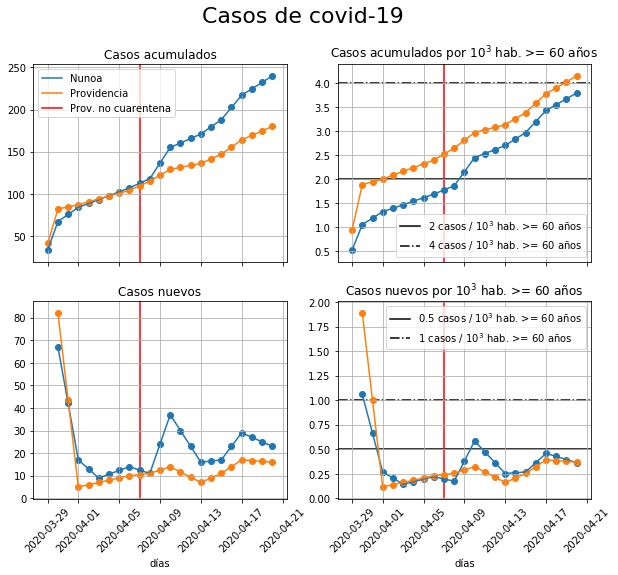

In [7]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Casos de covid-19',  y=0.98, fontsize = 22)

column = 'cum_cases'
title = 'Casos acumulados'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0, label='Prov. no cuarentena')
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'cum_cases_per_100th'
title = 'Casos acumulados por $10^3$ hab. >= 60 años'
loc_leg = 'best'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
axs[0,1].axhline(y=2, c="k", linestyle='-', zorder=0, label='2 casos / $10^3$ hab. >= 60 años')
axs[0,1].axhline(y=4, c="k", linestyle='-.', zorder=0, label='4 casos / $10^3$ hab. >= 60 años')
axs[0,1].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cases'
title = 'Casos nuevos'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
axs[1,0].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cases_per_100th'
title = 'Casos nuevos por $10^3$ hab. >= 60 años'
xlabel = 'días'
loc_leg = 'best'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
axs[1,1].axhline(y=0.5, c="k", linestyle='-', zorder=0, label='0.5 casos / $10^3$ hab. >= 60 años')
axs[1,1].axhline(y=1, c="k", linestyle='-.', zorder=0, label='1 casos / $10^3$ hab. >= 60 años')
axs[1,1].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

#fig.tight_layout()
image_name = 'Covid19ChileCumOld.jpg'
folder_path = r'C:\Users\HN566KT\Downloads'
image_path = os.path.join(folder_path, image_name)
plt.savefig(image_path)

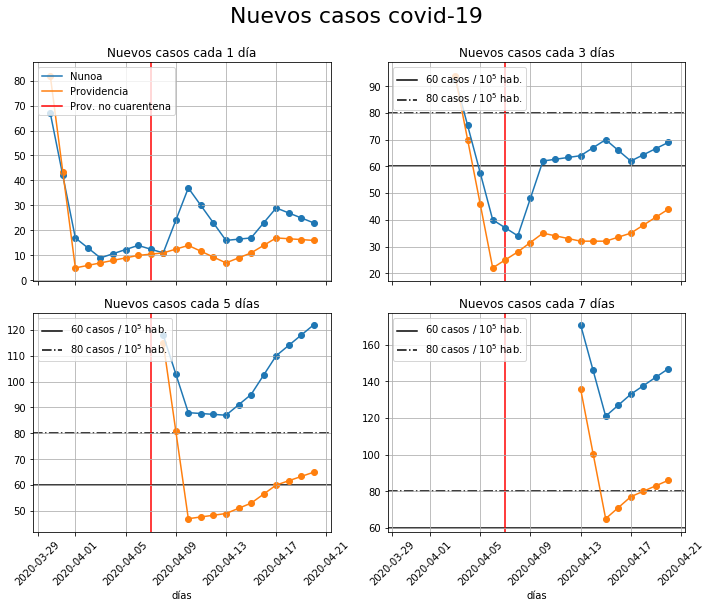

In [8]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Nuevos casos covid-19',  y=1.05, fontsize = 22)

column = 'new_cases'
title = 'Nuevos casos cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0, label='Prov. no cuarentena')
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'new_cases3'
title = 'Nuevos casos cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
axs[0,1].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[0,1].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[0,1].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cases5'
title = 'Nuevos casos cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
axs[1,0].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,0].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[1,0].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cases7'
title = 'Nuevos casos cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
axs[1,1].axhline(y=60, c="k", linestyle='-', zorder=0, label='60 casos / $10^5$ hab.')
axs[1,1].axhline(y=80, c="k", linestyle='-.', zorder=0, label='80 casos / $10^5$ hab.')
axs[1,1].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
image_name = 'Covid19ChileNewOldDays.jpg'
folder_path = r'C:\Users\HN566KT\Downloads'
image_path = os.path.join(folder_path, image_name)
plt.savefig(image_path)

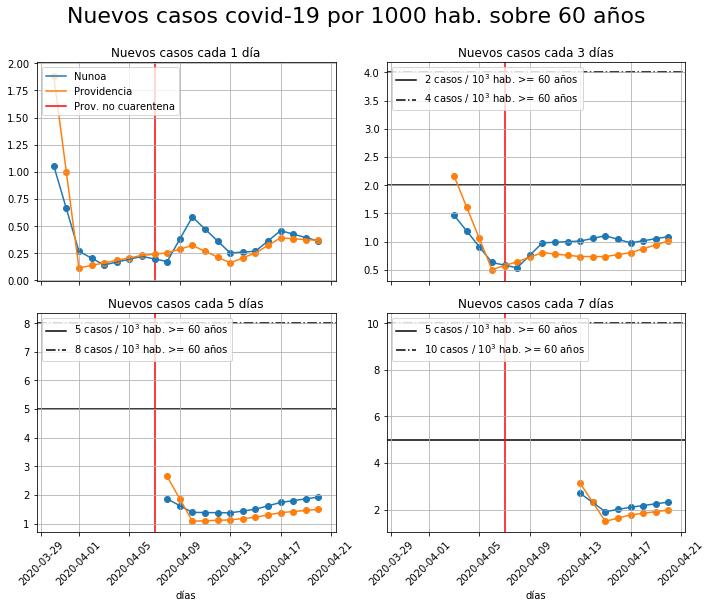

In [9]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Nuevos casos covid-19 por 1000 hab. sobre 60 años',  y=1.05, fontsize = 22)

column = 'new_cases_per_100th'
title = 'Nuevos casos cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0, label='Prov. no cuarentena')
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'new_cases3_per_100th'
title = 'Nuevos casos cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
axs[0,1].axhline(y=2, c="k", linestyle='-', zorder=0, label='2 casos / $10^3$ hab. >= 60 años')
axs[0,1].axhline(y=4, c="k", linestyle='-.', zorder=0, label='4 casos / $10^3$ hab. >= 60 años ')
axs[0,1].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cases5_per_100th'
title = 'Nuevos casos cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
axs[1,0].axhline(y=5, c="k", linestyle='-', zorder=0, label='5 casos / $10^3$ hab. >= 60 años')
axs[1,0].axhline(y=8, c="k", linestyle='-.', zorder=0, label='8 casos / $10^3$ hab. >= 60 años')
axs[1,0].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cases7_per_100th'
title = 'Nuevos casos cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
axs[1,1].axhline(y=5, c="k", linestyle='-', zorder=0, label='5 casos / $10^3$ hab. >= 60 años')
axs[1,1].axhline(y=10, c="k", linestyle='-.', zorder=0, label='10 casos / $10^3$ hab. >= 60 años')
axs[1,1].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
image_name = 'Covid19ChileNew1e3OldDays.jpg'
folder_path = r'C:\Users\HN566KT\Downloads'
image_path = os.path.join(folder_path, image_name)
plt.savefig(image_path)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


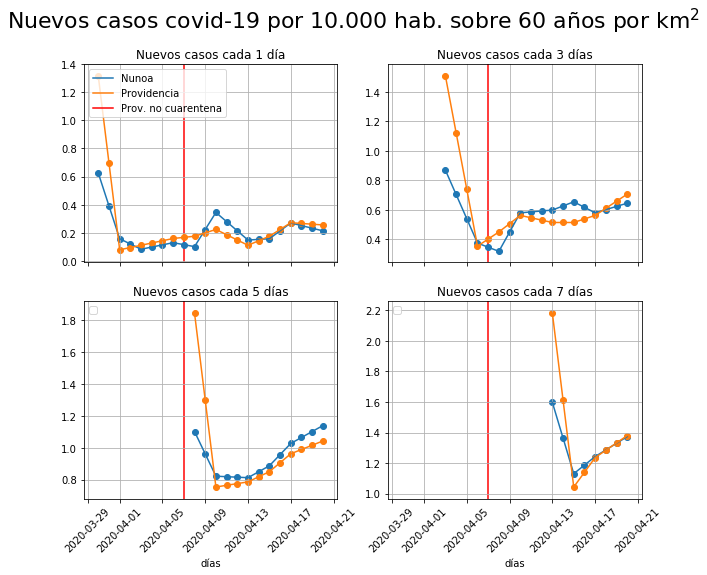

In [10]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Nuevos casos covid-19 por 10.000 hab. sobre 60 años por km$^2$',  y=0.98, fontsize = 22)

column = 'new_cas_per_100th_area'
title = 'Nuevos casos cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0, label='Prov. no cuarentena')
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'new_cas3_per_100th_area'
title = 'Nuevos casos cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
axs[0,1].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'new_cas5_per_100th_area'
title = 'Nuevos casos cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
axs[1,0].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'new_cas7_per_100th_area'
title = 'Nuevos casos cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
axs[1,1].axvline(x='04-07-2020', c="r", linestyle='-', zorder=0)
axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

#fig.tight_layout()
image_name = 'Covid19ChileNew1d3km2Old.jpg'
folder_path = r'C:\Users\HN566KT\Downloads'
image_path = os.path.join(folder_path, image_name)
plt.savefig(image_path)

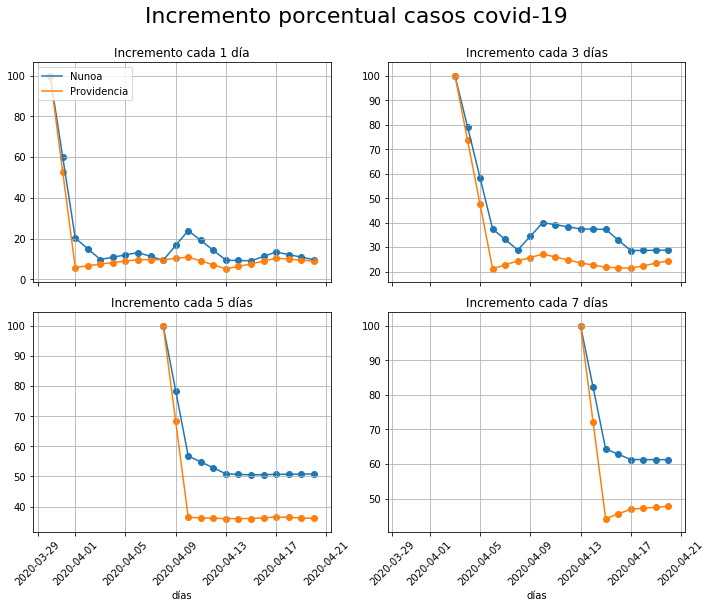

In [11]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(10,8))
fig.suptitle('Incremento porcentual casos covid-19',  y=1.05, fontsize = 22)

column = 'increment'
title = 'Incremento cada 1 día'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,0].plot(x_tim, lst_y[ind], label=lst_cmn[ind])
    axs[0,0].scatter(x_tim, lst_y[ind])
axs[0,0].legend(loc=loc_leg)
axs[0,0].set_title(title)
if log_scale:
    axs[0,0].yscale('log')
axs[0,0].grid()

column = 'increment3'
title = 'Incremento cada 3 días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[0,1].plot(x_tim, lst_y[ind])
    axs[0,1].scatter(x_tim, lst_y[ind])
#axs[0,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[0,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
#axs[0,1].legend(loc=loc_leg)
axs[0,1].set_title(title)
if log_scale:
    axs[0,1].set_yscale('log')
axs[0,1].grid()

column = 'increment5'
title = 'Incremento cada 5 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,0].plot(x_tim, lst_y[ind])
    axs[1,0].scatter(x_tim, lst_y[ind])
#axs[1,0].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[1,0].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
#axs[1,0].legend(loc=loc_leg)
axs[1,0].set_title(title)
axs[1,0].set_xlabel(xlabel, fontsize = 10)
axs[1,0].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,0].set_yscale('log')
axs[1,0].grid()

column = 'increment7'
title = 'Incremento cada 7 días'
xlabel = 'días'
loc_leg = 'upper left'
log_scale = False
lst_y = []
x_tim = lst_ts[0].index[1:]
for ind in range(ncmn):
    lst_y.append(lst_ts[ind][column].values[1:])
for ind in range(ncmn):
    axs[1,1].plot(x_tim, lst_y[ind])
    axs[1,1].scatter(x_tim, lst_y[ind])
#axs[1,1].axhline(y=50, c="k", linestyle='-', zorder=0, label='50 casos / $10^5$ hab.')
#axs[1,1].axhline(y=60, c="k", linestyle='-.', zorder=0, label='60 casos / $10^5$ hab.')
#axs[1,1].legend(loc=loc_leg)
axs[1,1].set_title(title)
axs[1,1].set_xlabel(xlabel, fontsize = 10)
axs[1,1].tick_params('x', labelrotation=45, labelsize=10)
if log_scale:
    axs[1,1].set_yscale('log')
axs[1,1].grid()

fig.tight_layout()
#image_name = 'Covid19ChileUCIDeadsCumRatio.jpg'
#folder_path = r'C:\Users\HN566KT\Downloads'
#image_path = os.path.join(folder_path, image_name)
#plt.savefig(image_path)